In [82]:
import numpy as np
from functools import partial
import matplotlib.pyplot as plt

In [83]:
def state_update(state, measurement, measurement_noise, covariance):
    kalman_gain = covariance / (covariance + measurement_noise)
    updated_state = state + kalman_gain * (measurement - state)
    updated_covariance = (1 - kalman_gain) * covariance
    return updated_state, updated_covariance

def state_predict(state, covariance, moddel_dynamics):
    return moddel_dynamics(state, covariance)

def kalman_filter(measurements, measurements_noise, initial_state, intial_covariance, model_dynamics):
    state = []
    covariance = []

    prior_state = []
    prior_covariance = []

    intial_prediction = state_predict(initial_state, intial_covariance, model_dynamics)
    prior_state.append(intial_prediction[0])
    prior_covariance.append(intial_prediction[1])

    for measurement, noise in zip(measurements, measurements_noise):
        updated_state, updated_covariance = state_update(prior_state[-1], measurement, noise, prior_covariance[-1])
        state.append(updated_state)
        covariance.append(updated_covariance)
        predicted_sate, predicted_covariance = state_predict(updated_state, updated_covariance, model_dynamics)
        prior_state.append(predicted_sate)
        prior_covariance.append(predicted_covariance)
        
    return np.array(state), np.array(covariance), np.array(prior_state), np.array(prior_covariance)

Measurements:
 [49.03 48.44 55.21 49.98 50.6  52.61 45.87 42.64 48.26 55.84]
Filtered Data:
 [50.127      49.32789474 51.21857143 50.9172973  50.85521739 51.14236364
 50.4009375  49.44410959 49.31414634 49.95956044]
Covariance:
 [22.5        11.84210526  8.03571429  6.08108108  4.89130435  4.09090909
  3.515625    3.08219178  2.74390244  2.47252747]


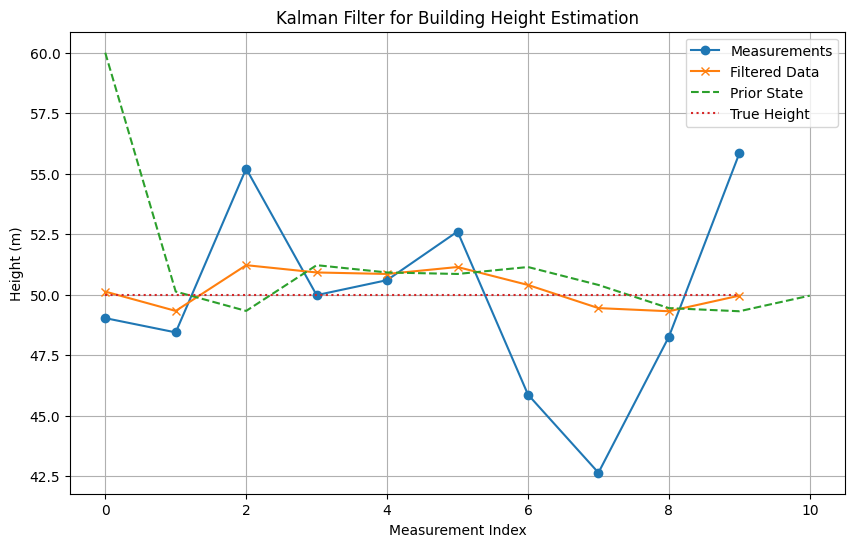

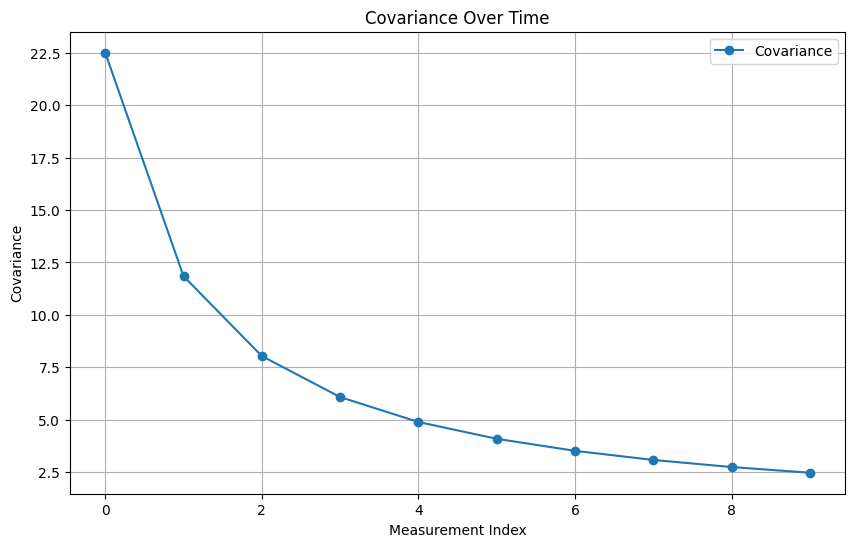

In [84]:
# Building height model
def building_model_dynamics(state, covariance):
    # Assuming a constant height model with no dynamics
    return state, covariance

# The ten measurements are: 49.03m, 48.44m, 55.21m, 49.98m, 50.6m, 52.61m,45.87m, 42.64m, 48.26m, 55.84m.
measurements = np.array([49.03, 48.44, 55.21, 49.98, 50.6, 52.61, 45.87, 42.64, 48.26, 55.84]).reshape(-1, 1)
measurements_noise = np.array([25] * 10).reshape(-1, 1)  # Assuming constant measurement noise
initial_state = np.array([60])  # Initial height guess
initial_covariance = np.array([225])  # Initial covariance guess
true_height = np.array([50] * 10).reshape(-1, 1)  # True height for comparison

filtered_data, covariance, prior_state, prior_covariance = kalman_filter(
    measurements, measurements_noise, initial_state, initial_covariance, model_dynamics=building_model_dynamics
)

print("Measurements:\n", measurements.flatten())
print("Filtered Data:\n", filtered_data.flatten())
print("Covariance:\n", covariance.flatten())

plt.figure(figsize=(10, 6))
plt.plot(measurements, label='Measurements', marker='o')
plt.plot(filtered_data, label='Filtered Data', marker='x')
plt.plot(prior_state, label='Prior State', linestyle='--')
plt.plot(true_height, label='True Height', linestyle=':')
# plt.fill_between(range(len(filtered_data)),
#                  prior_state.flatten() - np.sqrt(prior_covariance.flatten()),
#                  prior_state.flatten() + np.sqrt(prior_covariance.flatten()),
                #  color='gray', alpha=0.2, label='Uncertainty')
plt.title('Kalman Filter for Building Height Estimation')
plt.xlabel('Measurement Index')
plt.ylabel('Height (m)')
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(covariance, label='Covariance', marker='o')
# plt.plot(prior_covariance, label='Prior Covariance', linestyle='--')
plt.title('Covariance Over Time')
plt.xlabel('Measurement Index')
plt.ylabel('Covariance')
plt.legend()
plt.grid()
plt.show()

Measurements with Process Noise:
 [49.986 49.963 50.09  50.001 50.018 50.05  49.938 49.858 49.965 50.114]
Filtered Data:
 [49.98601001 49.97450501 50.01300339 50.01000253 50.01160204 50.01800175
 50.00657278 49.98800086 49.98544515 49.998301  ]
Covariance:
 [0.00999999 0.005      0.00333334 0.00250001 0.00200001 0.00166668
 0.00142859 0.00125002 0.00111114 0.00100003]


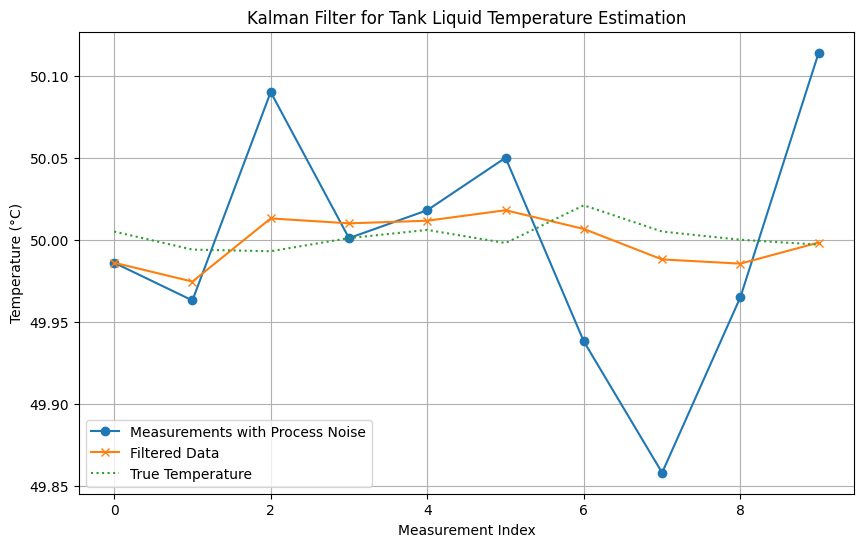

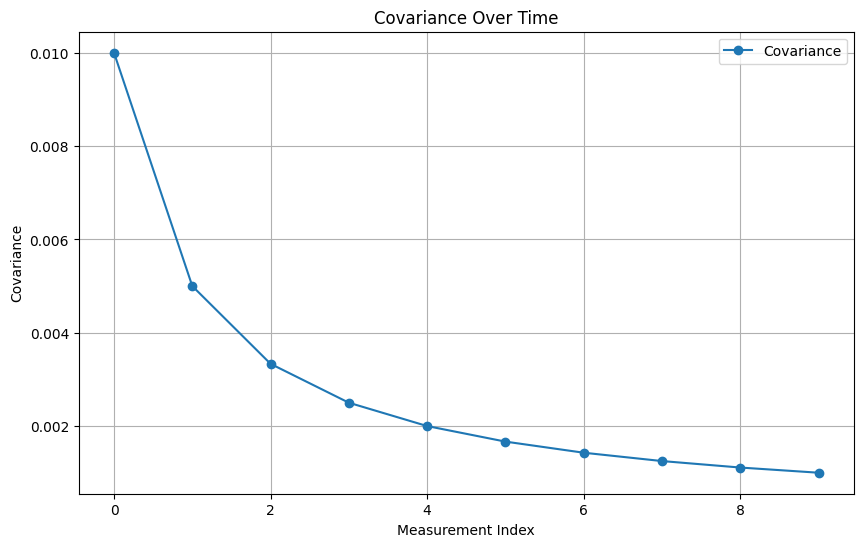

In [85]:
# Process noise for tank liquid temperature model
def tank_liquid_temperature_model_dynamics(state, covariance):
    # Assuming a constant temperature model with no dynamics
    process_noise = 0.0001 ** 2
    return state, covariance + process_noise

# The true liquid temperature values at the measurement points are: 50.005oC,49.994oC, 49.993oC, 50.001oC, 50.006oC, 49.998oC, 50.021oC, 50.005oC, 50oC, and 49.997oC.
# The measurements are: 49.986oC, 49.963oC, 50.09oC, 50.001oC, 50.018oC, 50.05oC, 49.938oC, 49.858oC, 49.965oC, and 50.114oC.
measurements_with_process_noise = np.array([49.986, 49.963, 50.09, 50.001, 50.018, 50.05, 49.938, 49.858, 49.965, 50.114]).reshape(-1, 1)
measurements_noise = np.array([0.1**2] * 10).reshape(-1, 1)  # Assuming constant measurement noise

true_measurements = np.array([50.005, 49.994, 49.993, 50.001, 50.006, 49.998, 50.021, 50.005, 50, 49.997]).reshape(-1, 1)  # True temperature values

initial_state = np.array([60])  # Initial temperature guess
initial_covariance = np.array([100**2])  # Initial covariance guess

filtered_data, covariance, prior_state, prior_covariance = kalman_filter(
    measurements_with_process_noise, measurements_noise, initial_state, initial_covariance, model_dynamics=tank_liquid_temperature_model_dynamics
)

print("Measurements with Process Noise:\n", measurements_with_process_noise.flatten())
print("Filtered Data:\n", filtered_data.flatten())
print("Covariance:\n", covariance.flatten())

plt.figure(figsize=(10, 6))
plt.plot(measurements_with_process_noise, label='Measurements with Process Noise', marker='o')
plt.plot(filtered_data, label='Filtered Data', marker='x')
# plt.plot(prior_state, label='Prior State', linestyle='--')
plt.plot(true_measurements, label='True Temperature', linestyle=':')
# plt.fill_between(range(len(filtered_data)),
#                  prior_state.flatten() - np.sqrt(prior_covariance.flatten()),
#                  prior_state.flatten() + np.sqrt(prior_covariance.flatten()),
#                  color='gray', alpha=0.2, label='Uncertainty')
plt.title('Kalman Filter for Tank Liquid Temperature Estimation')
plt.xlabel('Measurement Index')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(covariance, label='Covariance', marker='o')
# plt.plot(prior_covariance, label='Prior Covariance', linestyle='--')
plt.title('Covariance Over Time')
plt.xlabel('Measurement Index')
plt.ylabel('Covariance')
plt.legend()
plt.grid()
plt.show()

Measurements with Process Noise (Heating):
 [50.486 50.963 51.597 52.001 52.518 53.05  53.438 53.858 54.465 55.114]
Filtered Data:
 [50.48600961 50.77450481 51.11533686 51.41175328 51.71300379 52.01917168
 52.30757815 52.58888403 52.8862347  53.19901727]
Covariance:
 [0.00999999 0.005      0.00333334 0.00250001 0.00200001 0.00166668
 0.00142859 0.00125002 0.00111114 0.00100003]


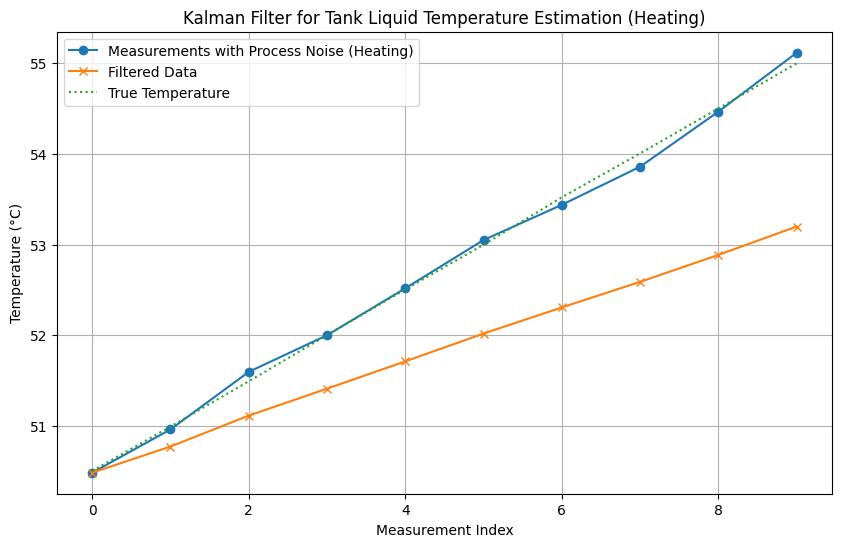

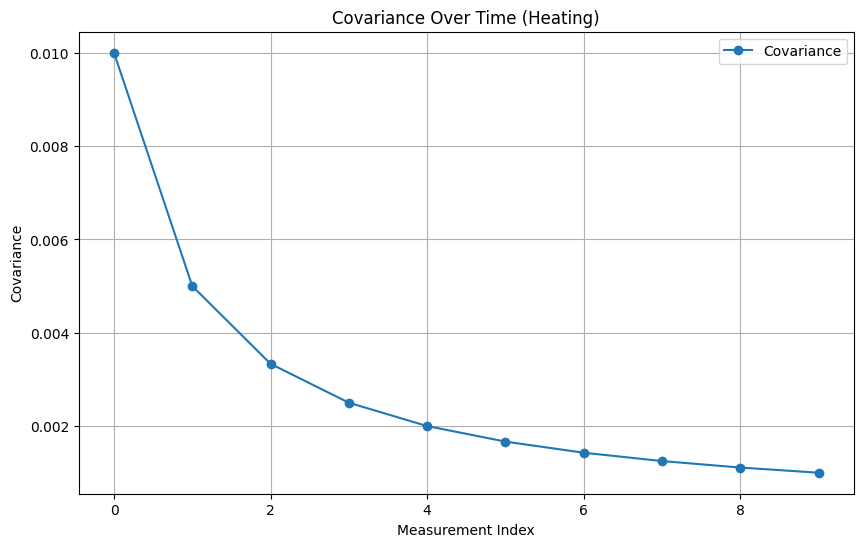

In [86]:
# Process noise for tank liquid temperature model heating 0.1 every 1 second
def tank_liquid_temperature_model_dynamics_heating(state, covariance):
    # Assuming a constant temperature heating 0.1 every second
    process_noise = 0.0001 ** 2
    return state + 0.1, covariance + process_noise

# The true liquid temperature values at the measurement points are: 50.505oC, 50.994oC,51.493oC,52.001oC,52.506oC,52.998oC,53.521oC,54.005oC,54.5oC, and 54.997oC.
# The measurements are: 50.486oC, 50.963oC, 51.597oC, 52.001oC, 52.518oC, 53.05oC, 53.438oC, 53.858oC, 54.465oC, and 55.114oC.
measurements_with_process_noise = np.array([50.486, 50.963, 51.597, 52.001, 52.518, 53.05, 53.438, 53.858, 54.465, 55.114]).reshape(-1, 1)
measurements_noise = np.array([0.1**2] * 10).reshape(-1, 1)  # Assuming constant measurement noise

true_measurements = np.array([50.505, 50.994, 51.493, 52.001, 52.506, 52.998, 53.521, 54.005, 54.5, 54.997]).reshape(-1, 1)  # True temperature values

initial_state = np.array([60])  # Initial temperature guess
initial_covariance = np.array([100**2])  # Initial covariance guess

filtered_data, covariance, prior_state, prior_covariance = kalman_filter(
    measurements_with_process_noise, measurements_noise, initial_state, initial_covariance, model_dynamics=tank_liquid_temperature_model_dynamics_heating
)
print("Measurements with Process Noise (Heating):\n", measurements_with_process_noise.flatten())
print("Filtered Data:\n", filtered_data.flatten())
print("Covariance:\n", covariance.flatten())

plt.figure(figsize=(10, 6))
plt.plot(measurements_with_process_noise, label='Measurements with Process Noise (Heating)', marker='o')
plt.plot(filtered_data, label='Filtered Data', marker='x')
# plt.plot(prior_state, label='Prior State', linestyle='--')
plt.plot(true_measurements, label='True Temperature', linestyle=':')
# plt.fill_between(range(len(filtered_data)),
#                  prior_state.flatten() - np.sqrt(prior_covariance.flatten()),
#                  prior_state.flatten() + np.sqrt(prior_covariance.flatten()),
#                  color='gray', alpha=0.2, label='Uncertainty')
plt.title('Kalman Filter for Tank Liquid Temperature Estimation (Heating)')
plt.xlabel('Measurement Index')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(covariance, label='Covariance', marker='o')
# plt.plot(prior_covariance, label='Prior Covariance', linestyle='--')
plt.title('Covariance Over Time (Heating)')
plt.xlabel('Measurement Index')
plt.ylabel('Covariance')
plt.legend()
plt.grid()
plt.show()

Measurements with Process Noise (Heating):
 [50.486 50.963 51.597 52.001 52.518 53.05  53.438 53.858 54.465 55.114]
Filtered Data:
 [50.48600961 50.87429636 51.44189433 51.88624985 52.38506436 52.90876622
 53.33069156 53.75117289 54.31154322 54.93838581]
Covariance:
 [0.00999999 0.00764706 0.00750916 0.00750057 0.00750004 0.0075
 0.0075     0.0075     0.0075     0.0075    ]


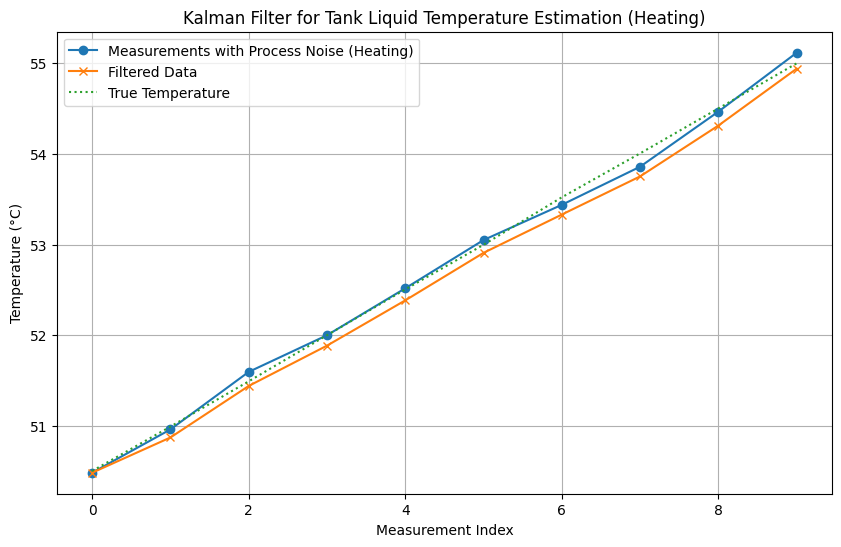

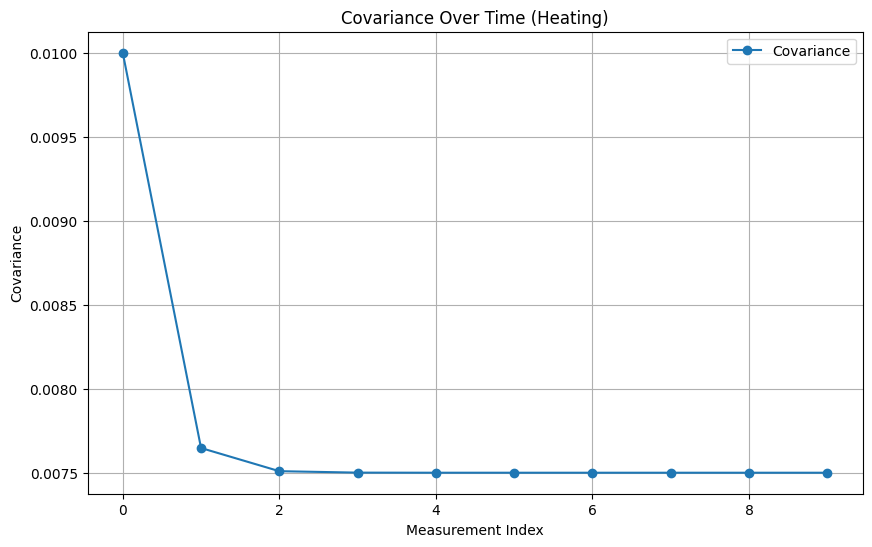

In [87]:
# Process noise for tank liquid temperature model heating 0.1 every 1 second
def tank_liquid_temperature_model_dynamics_heating(state, covariance):
    # Assuming a constant temperature heating 0.1 every second
    process_noise = 0.15 ** 2
    return state + 0.1, covariance + process_noise

# The true liquid temperature values at the measurement points are: 50.505oC, 50.994oC,51.493oC,52.001oC,52.506oC,52.998oC,53.521oC,54.005oC,54.5oC, and 54.997oC.
# The measurements are: 50.486oC, 50.963oC, 51.597oC, 52.001oC, 52.518oC, 53.05oC, 53.438oC, 53.858oC, 54.465oC, and 55.114oC.
measurements_with_process_noise = np.array([50.486, 50.963, 51.597, 52.001, 52.518, 53.05, 53.438, 53.858, 54.465, 55.114]).reshape(-1, 1)
measurements_noise = np.array([0.1**2] * 10).reshape(-1, 1)  # Assuming constant measurement noise

true_measurements = np.array([50.505, 50.994, 51.493, 52.001, 52.506, 52.998, 53.521, 54.005, 54.5, 54.997]).reshape(-1, 1)  # True temperature values

initial_state = np.array([60])  # Initial temperature guess
initial_covariance = np.array([100**2])  # Initial covariance guess

filtered_data, covariance, prior_state, prior_covariance = kalman_filter(
    measurements_with_process_noise, measurements_noise, initial_state, initial_covariance, model_dynamics=tank_liquid_temperature_model_dynamics_heating
)
print("Measurements with Process Noise (Heating):\n", measurements_with_process_noise.flatten())
print("Filtered Data:\n", filtered_data.flatten())
print("Covariance:\n", covariance.flatten())

plt.figure(figsize=(10, 6))
plt.plot(measurements_with_process_noise, label='Measurements with Process Noise (Heating)', marker='o')
plt.plot(filtered_data, label='Filtered Data', marker='x')
# plt.plot(prior_state, label='Prior State', linestyle='--')
plt.plot(true_measurements, label='True Temperature', linestyle=':')
# plt.fill_between(range(len(filtered_data)),
#                  prior_state.flatten() - np.sqrt(prior_covariance.flatten()),
#                  prior_state.flatten() + np.sqrt(prior_covariance.flatten()),
#                  color='gray', alpha=0.2, label='Uncertainty')
plt.title('Kalman Filter for Tank Liquid Temperature Estimation (Heating)')
plt.xlabel('Measurement Index')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(covariance, label='Covariance', marker='o')
# plt.plot(prior_covariance, label='Prior Covariance', linestyle='--')
plt.title('Covariance Over Time (Heating)')
plt.xlabel('Measurement Index')
plt.ylabel('Covariance')
plt.legend()
plt.grid()
plt.show()